## Lecture 14 - Series

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame #do it like this so you don't need to write pd.Series or pd.DataFrame each time

In [9]:
#a series is like an array in Numpy, except it has labels so it's indexed
obj = Series([3,6,9,12])
obj

0     3
1     6
2     9
3    12
dtype: int64

In [10]:
obj.values

array([ 3,  6,  9, 12])

In [11]:
obj.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [12]:
#create a series with an index that we specify
ww2_cas = Series([8700000,4300000,3000000,2100000,400000],index=['USSR','Germany','China','Japan','USA'])
ww2_cas

USSR       8700000
Germany    4300000
China      3000000
Japan      2100000
USA         400000
dtype: int64

In [13]:
ww2_cas['USA'] #can use index name to get values

400000

In [14]:
#Check which countries had cas greater than 4 mill
ww2_cas[ww2_cas > 4000000]

USSR       8700000
Germany    4300000
dtype: int64

In [15]:
#can treat it like an ordered dictionary
'USSR' in ww2_cas

True

In [16]:
#can convert a Series into a dictionary
ww2_dict = ww2_cas.to_dict()
ww2_dict

{'China': 3000000,
 'Germany': 4300000,
 'Japan': 2100000,
 'USA': 400000,
 'USSR': 8700000}

In [17]:
#feed the dictionary back to a Series
ww2_series = Series(ww2_dict)
ww2_series

China      3000000
Germany    4300000
Japan      2100000
USA         400000
USSR       8700000
dtype: int64

In [18]:
#order the dictonary keys
countries = ['China', 'Germany', 'Japan', 'USA', 'USSR', 'Aregntina']

In [20]:
obj2 = Series(ww2_dict,index=countries)
obj2
#since Aregentina was not in there it gives it a null value

China        3000000
Germany      4300000
Japan        2100000
USA           400000
USSR         8700000
Aregntina        NaN
dtype: float64

In [21]:
#Pandas has built in methods to find NaN - isnull, notnull
pd.isnull(obj2)

China        False
Germany      False
Japan        False
USA          False
USSR         False
Aregntina     True
dtype: bool

In [22]:
pd.notnull(obj2)

China         True
Germany       True
Japan         True
USA           True
USSR          True
Aregntina    False
dtype: bool

In [24]:
ww2_series # just checking it out again

China      3000000
Germany    4300000
Japan      2100000
USA         400000
USSR       8700000
dtype: int64

In [25]:
obj2

China        3000000
Germany      4300000
Japan        2100000
USA           400000
USSR         8700000
Aregntina        NaN
dtype: float64

In [26]:
ww2_series + obj2 #will still line up by index, and Argentina will return NaN still

Aregntina         NaN
China         6000000
Germany       8600000
Japan         4200000
USA            800000
USSR         17400000
dtype: float64

In [27]:
obj2.name = "World War 2 Casualties"  # you can give the obj a name
obj2

China        3000000
Germany      4300000
Japan        2100000
USA           400000
USSR         8700000
Aregntina        NaN
Name: World War 2 Casualties, dtype: float64

In [29]:
obj2.index.name = 'Countries' #similar to labeling columns in excel
obj2

Countries
China        3000000
Germany      4300000
Japan        2100000
USA           400000
USSR         8700000
Aregntina        NaN
Name: World War 2 Casualties, dtype: float64

## Lecture 15 - DataFrames

In [30]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame  #do it like this so you don't need to write pd.Series or pd.DataFrame each time

In [32]:
import webbrowser #Python's built in function to call webbrowser
website='http://en.wikipedia.org/wiki/NFL_win-loss_records'
webbrowser.open(website)

True

In [33]:
# import what is copied to your clipboard
# automatically adds index on far left
nfl_frame = pd.read_clipboard()
nfl_frame

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North


In [35]:
#get column names
nfl_frame.columns

Index(['Rank', 'Team', 'Won', 'Lost', 'Tied*', 'Pct.', 'First Season',
       'Total Games', 'Conference'],
      dtype='object')

In [41]:
# two ways to call column names.  If there is only one word can call it like 'Team', otherwise call it like an index
# note: it is case sensitive, and will only return the last call (test by commenting out 'First Season' below)
nfl_frame.Team
nfl_frame['First Season']

0    1960
1    1920
2    1921
3    1966
4    1996
Name: First Season, dtype: int64

In [39]:
DataFrame(nfl_frame,columns=['Team','First Season','Total Games'])

,Team,First Season,Total Games
0,Dallas Cowboys,1960,894
1,Chicago Bears,1920,1357
2,Green Bay Packers,1921,1339
3,Miami Dolphins,1966,792
4,Baltimore Ravens,1996,326


In [42]:
# get first or last rows by using head/tail similar to R
nfl_frame.head()

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North


In [43]:
# retrieve rows from a particular index
nfl_frame.ix[3]

Rank                         4
Team            Miami Dolphins
Won                        443
Lost                       345
Tied*                        4
Pct.                     0.562
First Season              1966
Total Games                792
Conference            AFC East
Name: 3, dtype: object

In [44]:
# if you pass just one value it will the column with that value
nfl_frame['Stadium'] = "Levi's Stadium"
nfl_frame

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference,Stadium
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East,Levi's Stadium
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North,Levi's Stadium
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North,Levi's Stadium
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East,Levi's Stadium
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North,Levi's Stadium


In [45]:
# if you want to add numbers you can pass an array
nfl_frame['Stadium'] = np.arange(5)
nfl_frame

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference,Stadium
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East,0
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North,1
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North,2
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East,3
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North,4


In [47]:
# you can create a Series and pass it to a DataFrame as such, not the index values tell it where they belong
stadiums = Series(["Levi's Stadium", "AT&T Stadium"], index=[4,0])
stadiums

4    Levi's Stadium
0      AT&T Stadium
dtype: object

In [49]:
# this is how you would pass the above series to the DataFrame, notice that Pandas handles the null values well here
nfl_frame['Stadiums'] = stadiums
nfl_frame

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference,Stadium,Stadiums
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East,0,AT&T Stadium
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North,1,NaN
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North,2,NaN
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East,3,NaN
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North,4,Levi's Stadium


In [51]:
# delete entire column in DF 
del nfl_frame['Stadiums']
nfl_frame

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North


In [52]:
# can also creat a DataFrame by passing in dictionaries
data = {'City':['SF','LA','NYC'], 'Population':[837000,3880000,8400000]}

In [53]:
city_frame = DataFrame(data)

In [54]:
city_frame

,City,Population
0,SF,837000
1,LA,3880000
2,NYC,8400000


In [56]:
# to see all the calls to the DataFrame API visit the website below.  We'll go over almost all of this during the course
website = 'http://pandas.pydata.org/pandas-doc/dev/generated/pandas.DataFrame.html'
webbrowser.open(website)

True

## Lecture 16 - Index Objects 

In [57]:
my_ser = Series([1,2,3,4],index=['A','B','C','D'])
my_ser

A    1
B    2
C    3
D    4
dtype: int64

In [59]:
my_index = my_ser.index
my_index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [60]:
my_index[2]

'C'

In [61]:
my_index[2:]

Index(['C', 'D'], dtype='object')

In [62]:
my_index[0]

'A'

## Lecture 17 - Reindexing

In [64]:
from numpy.random import randn

In [65]:
ser1 = Series([1,2,3,4], index = ['A','B','C','D'])
ser1

A    1
B    2
C    3
D    4
dtype: int64

In [66]:
# reindex ser1 into ser2 with two addtional indexs
ser2 = ser1.reindex(['A','B','C','D','E','F'])
ser2

A     1
B     2
C     3
D     4
E   NaN
F   NaN
dtype: float64

In [68]:
# can also fill in values for new indexes
# since G is the new index it is filled using the fill_value attribute 
ser2.reindex(['A','B','C','D','E','F','G'], fill_value=0)

A     1
B     2
C     3
D     4
E   NaN
F   NaN
G     0
dtype: float64

In [69]:
ser3 = Series(['USA','Mexico','Canada'], index=[0,5,10])
ser3

0        USA
5     Mexico
10    Canada
dtype: object

In [70]:
ranger = range(15)
ranger

range(0, 15)

In [72]:
#ffill = forward fill (just like waterfall rountine in VBA)
#differnt methods you can pass here, check out documentation for more info
ser3.reindex(ranger,method='ffill')

0        USA
1        USA
2        USA
3        USA
4        USA
5     Mexico
6     Mexico
7     Mexico
8     Mexico
9     Mexico
10    Canada
11    Canada
12    Canada
13    Canada
14    Canada
dtype: object

In [73]:
#reindex rows and/or columns
dframe = DataFrame(randn(25).reshape((5,5)),index=['A','B','D','E','F'],
                   columns=['col1','col2','col3','col4','col5'])
dframe

,col1,col2,col3,col4,col5
A,-0.674256,0.266060,1.027684,0.117149,0.727924
B,-1.160530,-1.241965,-0.434522,1.112265,-1.031661
D,-0.098756,0.560448,1.773362,-0.651397,-0.663269
E,-0.038232,0.081254,0.574905,0.042631,-0.206114
F,1.951499,0.040971,0.407457,-0.122985,-0.715025


In [75]:
#let's reindex to add row C into to the table
dframe2 = dframe.reindex(['A','B','C','D','E','F'])
dframe2

,col1,col2,col3,col4,col5
A,-0.674256,0.266060,1.027684,0.117149,0.727924
B,-1.160530,-1.241965,-0.434522,1.112265,-1.031661
C,NaN,NaN,NaN,NaN,NaN
D,-0.098756,0.560448,1.773362,-0.651397,-0.663269
E,-0.038232,0.081254,0.574905,0.042631,-0.206114
F,1.951499,0.040971,0.407457,-0.122985,-0.715025


In [76]:
new_columns = ['col1','col2','col3','col4','col5','col6']

In [77]:
dframe2.reindex(columns=new_columns)

,col1,col2,col3,col4,col5,col6
A,-0.674256,0.266060,1.027684,0.117149,0.727924,NaN
B,-1.160530,-1.241965,-0.434522,1.112265,-1.031661,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,-0.098756,0.560448,1.773362,-0.651397,-0.663269,NaN
E,-0.038232,0.081254,0.574905,0.042631,-0.206114,NaN
F,1.951499,0.040971,0.407457,-0.122985,-0.715025,NaN


In [79]:
dframe

,col1,col2,col3,col4,col5
A,-0.674256,0.266060,1.027684,0.117149,0.727924
B,-1.160530,-1.241965,-0.434522,1.112265,-1.031661
D,-0.098756,0.560448,1.773362,-0.651397,-0.663269
E,-0.038232,0.081254,0.574905,0.042631,-0.206114
F,1.951499,0.040971,0.407457,-0.122985,-0.715025


In [80]:
dframe.ix[['A','B','C','D','E','F'],new_columns]

,col1,col2,col3,col4,col5,col6
A,-0.674256,0.266060,1.027684,0.117149,0.727924,NaN
B,-1.160530,-1.241965,-0.434522,1.112265,-1.031661,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,-0.098756,0.560448,1.773362,-0.651397,-0.663269,NaN
E,-0.038232,0.081254,0.574905,0.042631,-0.206114,NaN
F,1.951499,0.040971,0.407457,-0.122985,-0.715025,NaN


## Lecture 18 - Dropping Entries From DataFrame Series

In [82]:
ser1 = Series(np.arange(3),index=['a','b','c'])
ser1

a    0
b    1
c    2
dtype: int64

In [83]:
ser1.drop('b')

a    0
c    2
dtype: int64

In [84]:
dframe1 = DataFrame(np.arange(9).reshape((3,3)),index=['SF','LA','NY'],columns=['pop','size','year'])
dframe1

,pop,size,year
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [85]:
#drop LA row - this doesn't permently delete the row, if you wanted to you would have to save it like this....
#dframe1 = dframe1.drop('LA')
dframe1.drop('LA')

,pop,size,year
SF,0,1,2
NY,6,7,8


In [86]:
#to drop column use axis=1.  By default axis=0 which is row
dframe1.drop('year',axis=1)

,pop,size
SF,0,1
LA,3,4
NY,6,7


## Lecture 19 - Selecting Entries 

In [88]:
ser1 = Series(np.arange(3),index=['A','B','C'])
ser1 = 2*ser1
ser1

A    0
B    2
C    4
dtype: int64

In [90]:
#grab entries by index name
ser1['B']

2

In [91]:
#or by numerical value of the index 
ser1[1] 

2

In [93]:
ser1[0:3]

A    0
B    2
C    4
dtype: int64

In [94]:
ser1[['A','B']]

A    0
B    2
dtype: int64

In [95]:
#can grab using logic as well
ser1[ser1>3]

C    4
dtype: int64

In [97]:
#can set values using this method too
ser1[ser1>3] = 10
ser1

A     0
B     2
C    10
dtype: int64

In [98]:
# Now let's see how it looks in a dataframe
dframe = DataFrame(np.arange(25).reshape((5,5)),index=['SF','DC','Chi','NYC','LA'],
                  columns=['A','B','C','D','E'])
dframe

,A,B,C,D,E
SF,0,1,2,3,4
DC,5,6,7,8,9
Chi,10,11,12,13,14
NYC,15,16,17,18,19
LA,20,21,22,23,24


In [99]:
# select by column name
dframe['B']

SF      1
DC      6
Chi    11
NYC    16
LA     21
Name: B, dtype: int64

In [100]:
dframe[['B','E']]

,B,E
SF,1,4
DC,6,9
Chi,11,14
NYC,16,19
LA,21,24


In [101]:
dframe[dframe['C']>8]  #returns all rows where C is great than 8

,A,B,C,D,E
Chi,10,11,12,13,14
NYC,15,16,17,18,19
LA,20,21,22,23,24


In [102]:
# boolean dataframe
dframe>10

,A,B,C,D,E
SF,False,False,False,False,False
DC,False,False,False,False,False
Chi,False,True,True,True,True
NYC,True,True,True,True,True
LA,True,True,True,True,True


In [103]:
# use .ix to label dataframe
dframe.ix['LA']

A    20
B    21
C    22
D    23
E    24
Name: LA, dtype: int64

In [106]:
# can call by index name or index #
dframe.ix[4]

A    20
B    21
C    22
D    23
E    24
Name: LA, dtype: int64

## Lecture 20 - Data Alignment 

In [107]:
ser1 = Series([0,1,2],index=['A','B','C'])
ser1

A    0
B    1
C    2
dtype: int64

In [108]:
ser2 = Series([3,4,5,6],index=['A','B','C','D'])
ser2

A    3
B    4
C    5
D    6
dtype: int64

In [109]:
ser1 + ser2 #Pandas adds up the values, however since ser1 does not have a matching index, it adds a NaN value

A     3
B     5
C     7
D   NaN
dtype: float64

In [112]:
dframe1 = DataFrame(np.arange(4).reshape((2,2)),columns=list('AB'),index=['NYC','LA'])
dframe1

,A,B
NYC,0,1
LA,2,3


In [114]:
dframe2 = DataFrame(np.arange(9).reshape((3,3)),columns=list('ADC'),index=['NYC','SF','LA'])
dframe2

,A,D,C
NYC,0,1,2
SF,3,4,5
LA,6,7,8


In [115]:
dframe1 + dframe2 #only A was added because the other columns did not match up

,A,B,C,D
LA,8,NaN,NaN,NaN
NYC,0,NaN,NaN,NaN
SF,NaN,NaN,NaN,NaN


In [116]:
# using ADD function will put to two df together and will only code NaN for ones without a value
# note the fill_value=0 atribute 
dframe1.add(dframe2,fill_value=0)

,A,B,C,D
LA,8,3,8,7
NYC,0,1,2,1
SF,3,NaN,5,4


In [154]:
ser3 = dframe2.ix[0]
ser3

A    0
D    1
C    2
Name: NYC, dtype: int64

In [119]:
dframe2-ser3

,A,D,C
NYC,0,0,0
SF,3,3,3
LA,6,6,6


## Lecture 21 - Rank and Sort

In [121]:
ser1 = Series(range(3),index=['C','A','B'])
ser1

C    0
A    1
B    2
dtype: int64

In [122]:
#Sort by index
ser1.sort_index()

A    1
B    2
C    0
dtype: int64

In [124]:
#Sort by values in series
ser1.sort_values()

C    0
A    1
B    2
dtype: int64

In [125]:
from numpy.random import randn

In [126]:
ser2 = Series(randn(10))
ser2

0    0.706097
1    1.218206
2    1.347096
3   -0.095329
4   -1.992649
5    0.371594
6   -1.681097
7    2.410342
8    1.718566
9    0.291304
dtype: float64

In [128]:
ser2.sort_values()

4   -1.992649
6   -1.681097
3   -0.095329
9    0.291304
5    0.371594
0    0.706097
1    1.218206
2    1.347096
8    1.718566
7    2.410342
dtype: float64

In [129]:
# rank value is what python uses to sort the list in the above
ser2.rank()

4     1
6     2
3     3
9     4
5     5
0     6
1     7
2     8
8     9
7    10
dtype: float64

In [130]:
ser3 = Series(randn(10))
ser3

0   -1.310716
1   -1.231743
2   -0.619519
3    1.176413
4    2.023237
5   -1.684833
6   -0.410580
7    1.435409
8    1.000075
9    1.111693
dtype: float64

In [131]:
ser3.rank()

0     2
1     3
2     4
3     8
4    10
5     1
6     5
7     9
8     6
9     7
dtype: float64

In [143]:
ser3.sort_values()

5   -1.684833
0   -1.310716
1   -1.231743
2   -0.619519
6   -0.410580
8    1.000075
9    1.111693
3    1.176413
7    1.435409
4    2.023237
dtype: float64

In [144]:
ser3.rank()

5     1
0     2
1     3
2     4
6     5
8     6
9     7
3     8
7     9
4    10
dtype: float64

## Lecture 22 - Summary Statistics

In [145]:
arr = np.array([[1,2,np.nan],[np.nan,3,4],])

In [146]:
dframe1 = DataFrame(arr,index=['A','B'],columns=['One','Two','Three'])
dframe1

,One,Two,Three
A,1,2,NaN
B,NaN,3,4


In [147]:
# sum adds up all of the values by column, and skips over NaN values
dframe1.sum()

One      1
Two      5
Three    4
dtype: float64

In [148]:
# sum rows by indicating axis
dframe1.sum(axis=1)

A    3
B    7
dtype: float64

In [151]:
# min/max will return min/max value from each column
dframe1.min()

One      1
Two      2
Three    4
dtype: float64

In [152]:
# get index for min values
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [155]:
dframe1.cumsum() #only thing you'll notice here is BTwo since others have NaN values

,One,Two,Three
A,1,2,NaN
B,NaN,5,4


In [156]:
dframe1.describe()

,One,Two,Three
count,1,2.000000,1
mean,1,2.500000,4
std,NaN,0.707107,NaN
min,1,2.000000,4
25%,1,2.250000,4
50%,1,2.500000,4
75%,1,2.750000,4
max,1,3.000000,4


In [157]:
from IPython.display import YouTubeVideo  #will allow you to show YouTubeVideos 

In [158]:
# refresher on Covariance
YouTubeVideo('xGbpuFNR1ME')

In [160]:
# refresher on Correlation
YouTubeVideo('4EXNedimDMs')

In [170]:
# how to grab data off the web using pandas_datareader
import pandas_datareader.data as pdweb
import datetime

In [168]:
prices = pdweb.DataReader(['CVX','XOM','BP'],'yahoo',start=datetime.datetime(2010,1,1),
                          end=datetime.datetime(2013,1,1))['Adj Close']
prices.head()

,BP,CVX,XOM
Date,,,
2010-01-04,45.569012,63.917128,58.703696
2010-01-05,45.892578,64.369872,58.932905
2010-01-06,46.131402,64.377952,59.442264
2010-01-07,46.115994,64.135417,59.255504
2010-01-08,46.223849,64.248601,59.017797


In [171]:
volume = pdweb.DataReader(['CVX','XOM','BP'],'yahoo',start=datetime.datetime(2010,1,1),
                          end=datetime.datetime(2013,1,1))['Volume']

In [172]:
volume.head()

,BP,CVX,XOM
Date,,,
2010-01-04,3956100,10173800,27809100
2010-01-05,4109600,10593700,30174700
2010-01-06,6227900,11014600,35044700
2010-01-07,4431300,9626900,27192100
2010-01-08,3786100,5624300,24891800


In [173]:
# return is % change in price of stock, can get it by using pct_change()
rets = prices.pct_change()

In [174]:
# Correlation of the stocks 
corr = rets.corr

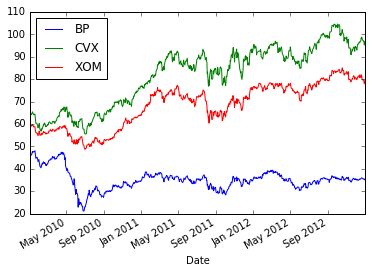

In [176]:
%matplotlib inline
prices.plot()

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


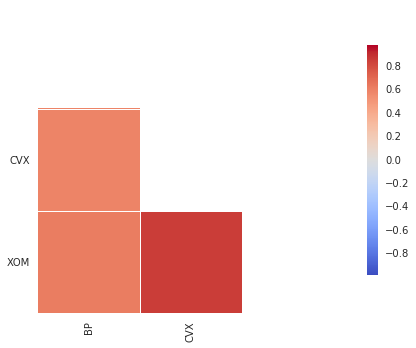

In [179]:
sns.corrplot(rets,annot=False,diag_names=False)

In [182]:
ser1 = Series(['w','w','x','y','z','w','x','y','x','a'])
ser1

0    w
1    w
2    x
3    y
4    z
5    w
6    x
7    y
8    x
9    a
dtype: object

In [183]:
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [184]:
ser1.value_counts()

w    3
x    3
y    2
a    1
z    1
dtype: int64

## Lecture 23 - Missing Data